# Workshop 1 - Project 2
## Clara Duchoissis & Patrick Silva

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance_matrix
import json
from shapely.geometry import Polygon
from shapely.geometry import Point
import os

In [2]:
df = pl.read_csv('dwca-birds_nk-v1.5/occurrence.txt', separator='\t')
df.describe()

statistic,id,institutionCode,basisOfRecord,occurrenceID,occurrenceRemarks,individualCount,eventDate,countryCode,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,vernacularName
str,str,str,str,str,str,f64,str,str,f64,f64,str,str,str,str,str,str,str,str,str
"""count""","""89632""","""89632""","""89632""","""89632""","""89632""",89552.0,"""89632""","""89632""",89632.0,89632.0,"""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632"""
"""null_count""","""0""","""0""","""0""","""0""","""0""",80.0,"""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,2.081472,null,null,-1.199514,37.039653,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,34.485674,null,null,1.415014,1.528497,null,null,null,null,null,null,null,null,null
"""min""","""00011221-51a1-4fe6-a6f7-16cf2e…","""Nature Kenya""","""HumanObservation""","""00011221-51a1-4fe6-a6f7-16cf2e…","""Critically Endangered (CR)""",1.0,"""2017-06-01""","""KE""",-4.719087,34.016667,"""Accipiter badius""","""Animalia""","""Chordata""","""AVES""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""Gallinago""","""Abbott's Booby"""
"""25%""",null,null,null,null,null,1.0,null,null,-1.67268,36.256333,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,1.0,null,null,-1.238391,36.8005,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,1.0,null,null,-0.332612,37.532486,null,null,null,null,null,null,null,null,null
"""max""","""ffffc424-17f5-467d-b736-928d37…","""Nature Kenya""","""HumanObservation""","""ffffc424-17f5-467d-b736-928d37…","""Vulnerable (VU)""",7000.0,"""2018-05-16""","""KE""",4.2018333,41.433333,"""agricola pallidus""","""Animalia""","""Chordata""","""Aves""","""passeriformes""","""Zosteropidae""","""pternistis""","""zonurus""","""black kite"""


In [3]:
df = df.drop_nulls()
df.head()

id,institutionCode,basisOfRecord,occurrenceID,occurrenceRemarks,individualCount,eventDate,countryCode,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,vernacularName
str,str,str,str,str,i64,str,str,f64,f64,str,str,str,str,str,str,str,str,str
"""579a9f82-3eab-45c2-875d-fcb634…","""Nature Kenya""","""HumanObservation""","""579a9f82-3eab-45c2-875d-fcb634…","""Least Concern (LC)""",1,"""2018-01-04""","""KE""",-2.223293,40.967442,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""190323ff-2e26-4964-961e-79ac0f…","""Nature Kenya""","""HumanObservation""","""190323ff-2e26-4964-961e-79ac0f…","""Least Concern (LC)""",1,"""2018-01-11""","""KE""",0.632465,36.035565,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""82c2acec-5ed5-4b92-be62-2b4352…","""Nature Kenya""","""HumanObservation""","""82c2acec-5ed5-4b92-be62-2b4352…","""Least Concern (LC)""",1,"""2018-01-12""","""KE""",1.010063,37.385208,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""e49afe06-1ab4-410e-8971-186b59…","""Nature Kenya""","""HumanObservation""","""e49afe06-1ab4-410e-8971-186b59…","""Least Concern (LC)""",1,"""2018-01-13""","""KE""",1.114823,37.460524,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""f34df1bf-97f4-47c8-baa8-58a2d4…","""Nature Kenya""","""HumanObservation""","""f34df1bf-97f4-47c8-baa8-58a2d4…","""Least Concern (LC)""",1,"""2018-01-30""","""KE""",1.014339,37.393476,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""


In [4]:
rows = len(df.select('id').rows())
print(f"The dataset has {rows} rows")

for column in df.columns:
    uc = len(df.select(column).unique().rows())
    print(f"The column '{column}' has a unique count of {uc}")

The dataset has 89552 rows
The column 'id' has a unique count of 89552
The column 'institutionCode' has a unique count of 1
The column 'basisOfRecord' has a unique count of 1
The column 'occurrenceID' has a unique count of 89552
The column 'occurrenceRemarks' has a unique count of 8
The column 'individualCount' has a unique count of 116
The column 'eventDate' has a unique count of 349
The column 'countryCode' has a unique count of 1
The column 'decimalLatitude' has a unique count of 54651
The column 'decimalLongitude' has a unique count of 54540
The column 'scientificName' has a unique count of 1265
The column 'kingdom' has a unique count of 1
The column 'phylum' has a unique count of 1
The column 'class' has a unique count of 2
The column 'order' has a unique count of 35
The column 'family' has a unique count of 113
The column 'genus' has a unique count of 443
The column 'specificEpithet' has a unique count of 937
The column 'vernacularName' has a unique count of 1424


In [5]:
institutionCode = df.item(0, "institutionCode")
basisOfRecord = df.item(0, "basisOfRecord")
countryCode = df.item(0, "countryCode")
kingdom = df.item(0, "kingdom")
phylum = df.item(0, "phylum")
    
df = df.drop(["institutionCode", "basisOfRecord", "countryCode", "kingdom", "phylum", "occurrenceID"])

In [6]:
df.group_by("order").len().sort("len")

order,len
str,u32
"""Accipitriforms""",1
"""Anatidae""",1
"""Procellariiformes""",5
"""passeriformes""",6
"""anseriformes""",17
…,…
"""Charadriiformes""",3931
"""Columbiformes""",4923
"""Accipitriformes""",5438


In [7]:
# will give error code and information on how to actually access the map of Kenya
# explains the links in the following markdown section
run = False
if run:
    kenya = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

We download the countries zip-file from the link in the error message. (https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)

It's the first download link on the site under 'Admin 0 – Countries'.

In [8]:
kenya = gpd.read_file("ne_110m_admin_0_countries.zip")
kenya = kenya[kenya.NAME == "Kenya"]

In [9]:
df.select("order").unique().sort("order")["order"].to_list()

['Accipitriformes',
 'Accipitriforms',
 'Anatidae',
 'Anseriformes',
 'Apodiformes',
 'Aves',
 'Bucerotiformes',
 'Caprimulgiformes',
 'Carprimulgiformes',
 'Charadriiformes',
 'Ciconiiformes',
 'Coliiformes',
 'Columbiformes',
 'Coraciiformes',
 'Cuculiformes',
 'Falconiformes',
 'Galliformes',
 'Gruiformes',
 'Musophagiformes',
 'Otidiformes',
 'Passeriformes',
 'Pelecaniformes',
 'Phoenicopteriformes',
 'Piciformes',
 'Podicipediformes',
 'Procellariiformes',
 'Psittaciformes',
 'Pterocliformes',
 'Strigiformes',
 'Struthioniformes',
 'Suliformes',
 'Trogoniformes',
 'anseriformes',
 'p',
 'passeriformes']

In [10]:
df = df.with_columns(
   pl.col("order").replace("Accipitriforms", "Accipitriformes")
      .replace("Carprimulgiformes", "Caprimulgiformes")
      .replace("anseriformes", "Anseriformes")
      .replace("passeriformes", "Passeriformes")
)

# QUESTION 1

In [11]:
q1_df = df.select("decimalLatitude", "decimalLongitude", "order", "individualCount") 
# other columns are not needed

In [12]:
def moran(df=q1_df, order=None):
    order_data = df
    if order:
        order_data = df.filter(pl.col('order') == order)
    
    latitudes = order_data['decimalLatitude'].to_list()
    longitudes = order_data['decimalLongitude'].to_list()
    counts = order_data['individualCount'].to_list()

    mean_counts = np.mean(counts)
    coords = np.vstack((longitudes, latitudes)).T
    dist_matrix = distance_matrix(coords, coords)
    dist_matrix[dist_matrix == 0] = 1e-10
    weights = 1 / dist_matrix
    W = np.sum(weights)
    N = len(counts)
    numerator = 0
    for i in range(N):
        for j in range(N):
            numerator += weights[i, j] * (counts[i] - mean_counts) * (counts[j] - mean_counts)

    denominator = np.sum((counts - mean_counts) ** 2)
    moran_i = (N / W) * (numerator / denominator)

    return moran_i


In [13]:
def plot_kenya_order(orders, moran_values):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.flatten()
    
    palette = ['#FF4500', '#00BFFF', '#00FF00', '#FF1493']

    for idx, order in enumerate(orders):
        order_data = q1_df.filter(pl.col('order') == order)
        ax = axes[idx]
        kenya.plot(ax=ax, color='#D3D3D3', edgecolor='black')

        sns.scatterplot(
            data=order_data, 
            x='decimalLongitude', 
            y='decimalLatitude', 
            color=palette[idx],
            size="individualCount",
            sizes=(20, 400),
            ax=ax, 
            alpha=0.8, 
            edgecolor='none'
        )
        
        if not order == "Passeriformes":
            moran_value = moran_values[idx]
            ax.set_title(f'Distribution of {order} Sightings\nMoran\'s I: {moran_value:.2f}')
        else:
            ax.set_title(f'Distribution of {order} Sightings')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.get_legend().remove()
        
    if len(orders) < 4:
        for i in range(len(orders), 4):
            fig.delaxes(axes[i]) 

    plt.tight_layout()
    plt.show()

/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_5912/361685013.py:23: RuntimeWarning: invalid value encountered in scalar divide
  moran_i = (N / W) * (numerator / denominator)


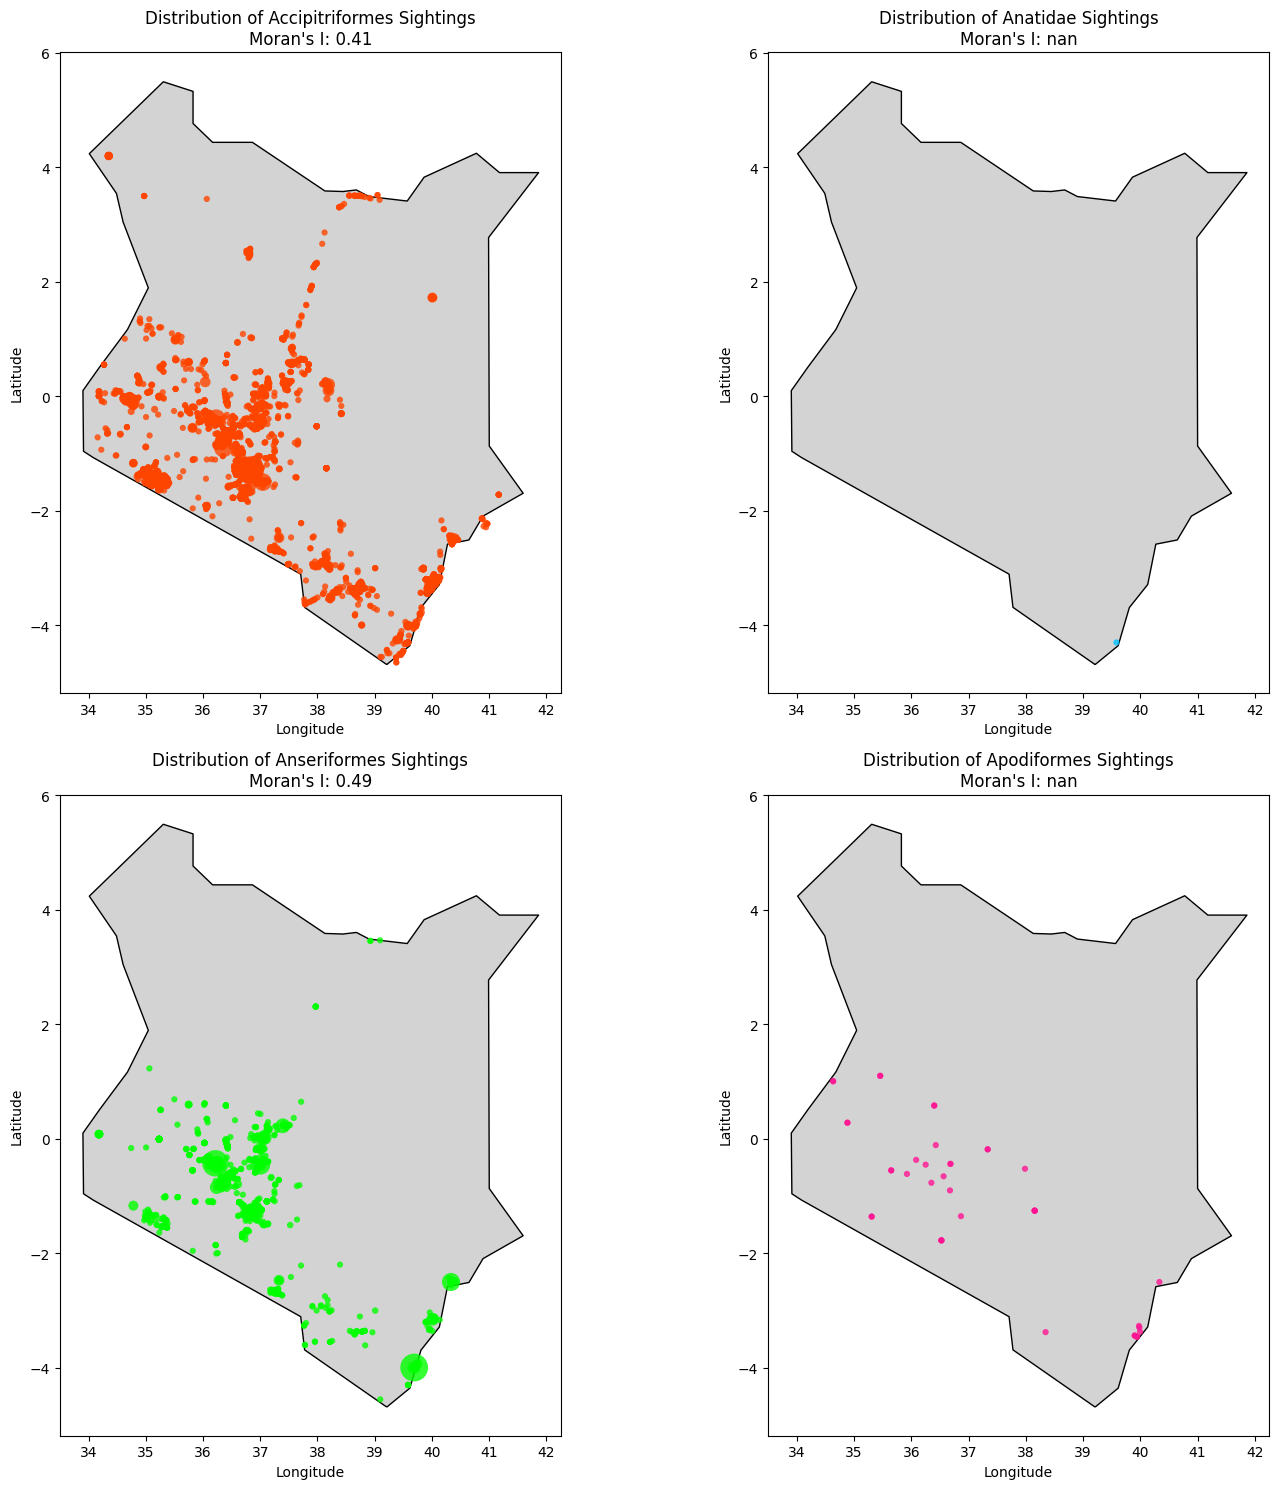

/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_5912/361685013.py:23: RuntimeWarning: invalid value encountered in scalar divide
  moran_i = (N / W) * (numerator / denominator)


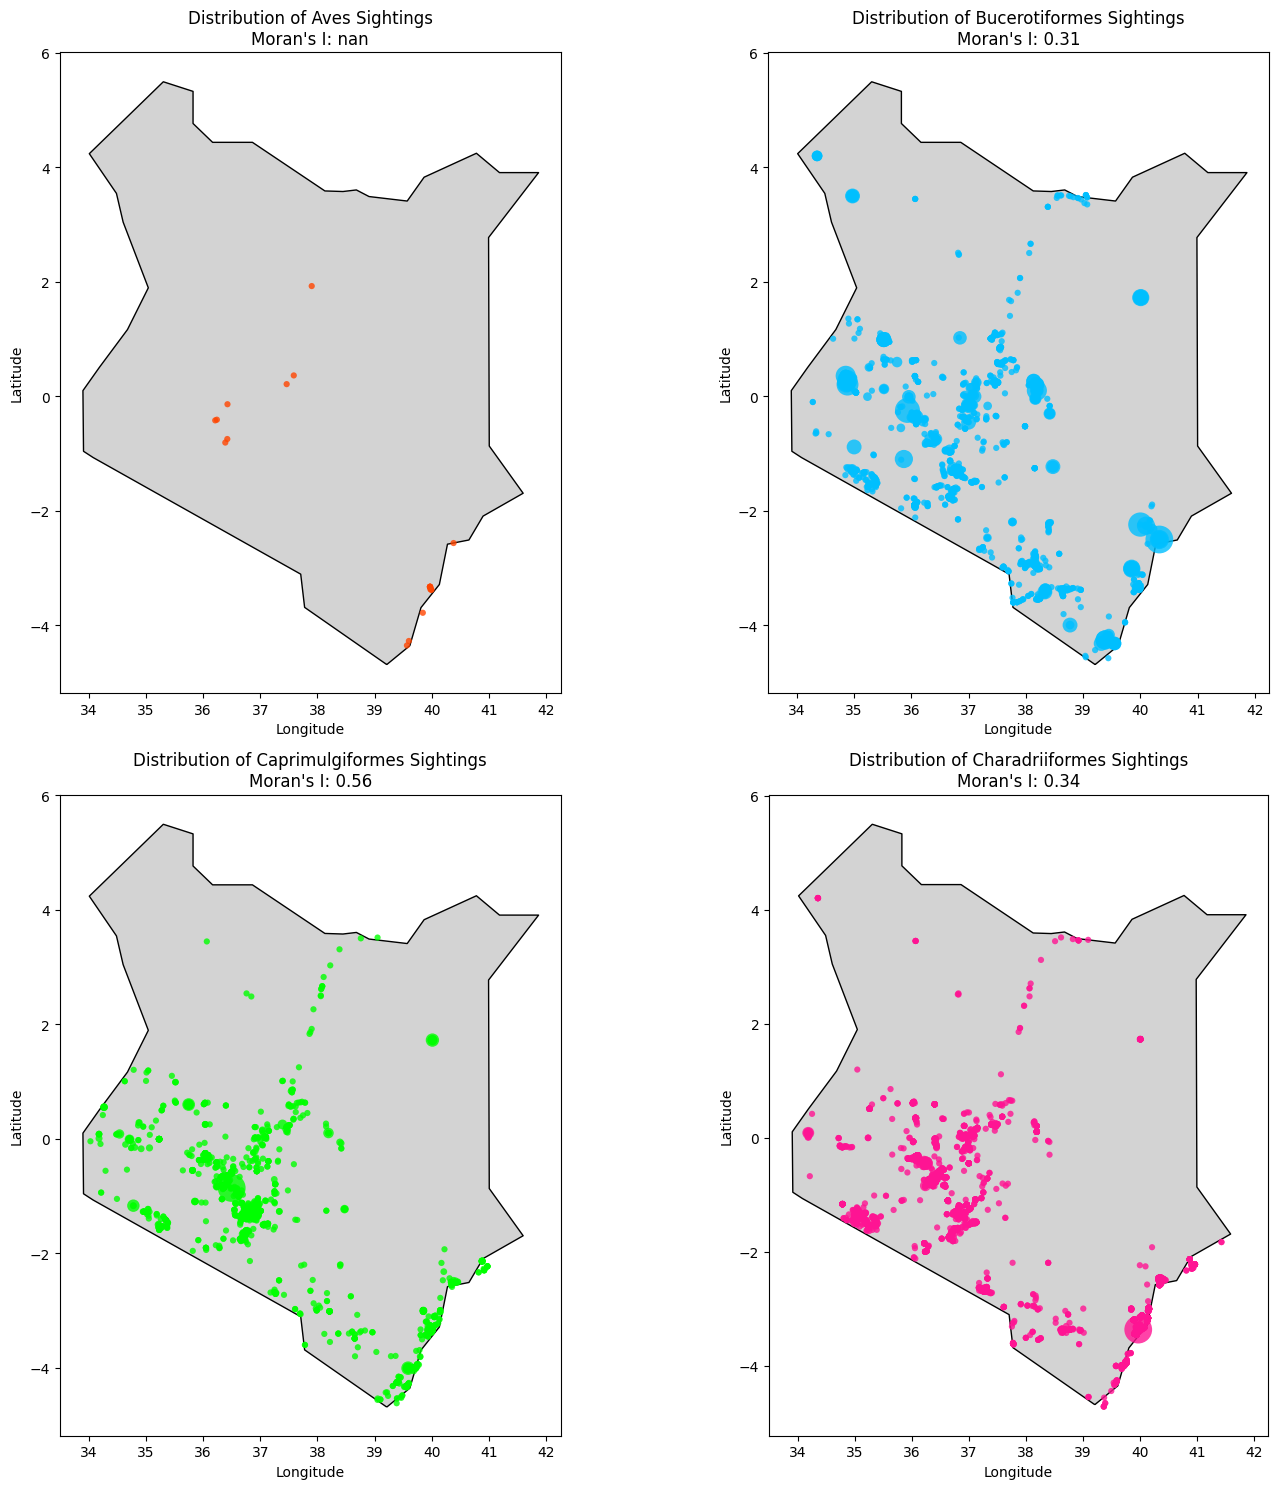

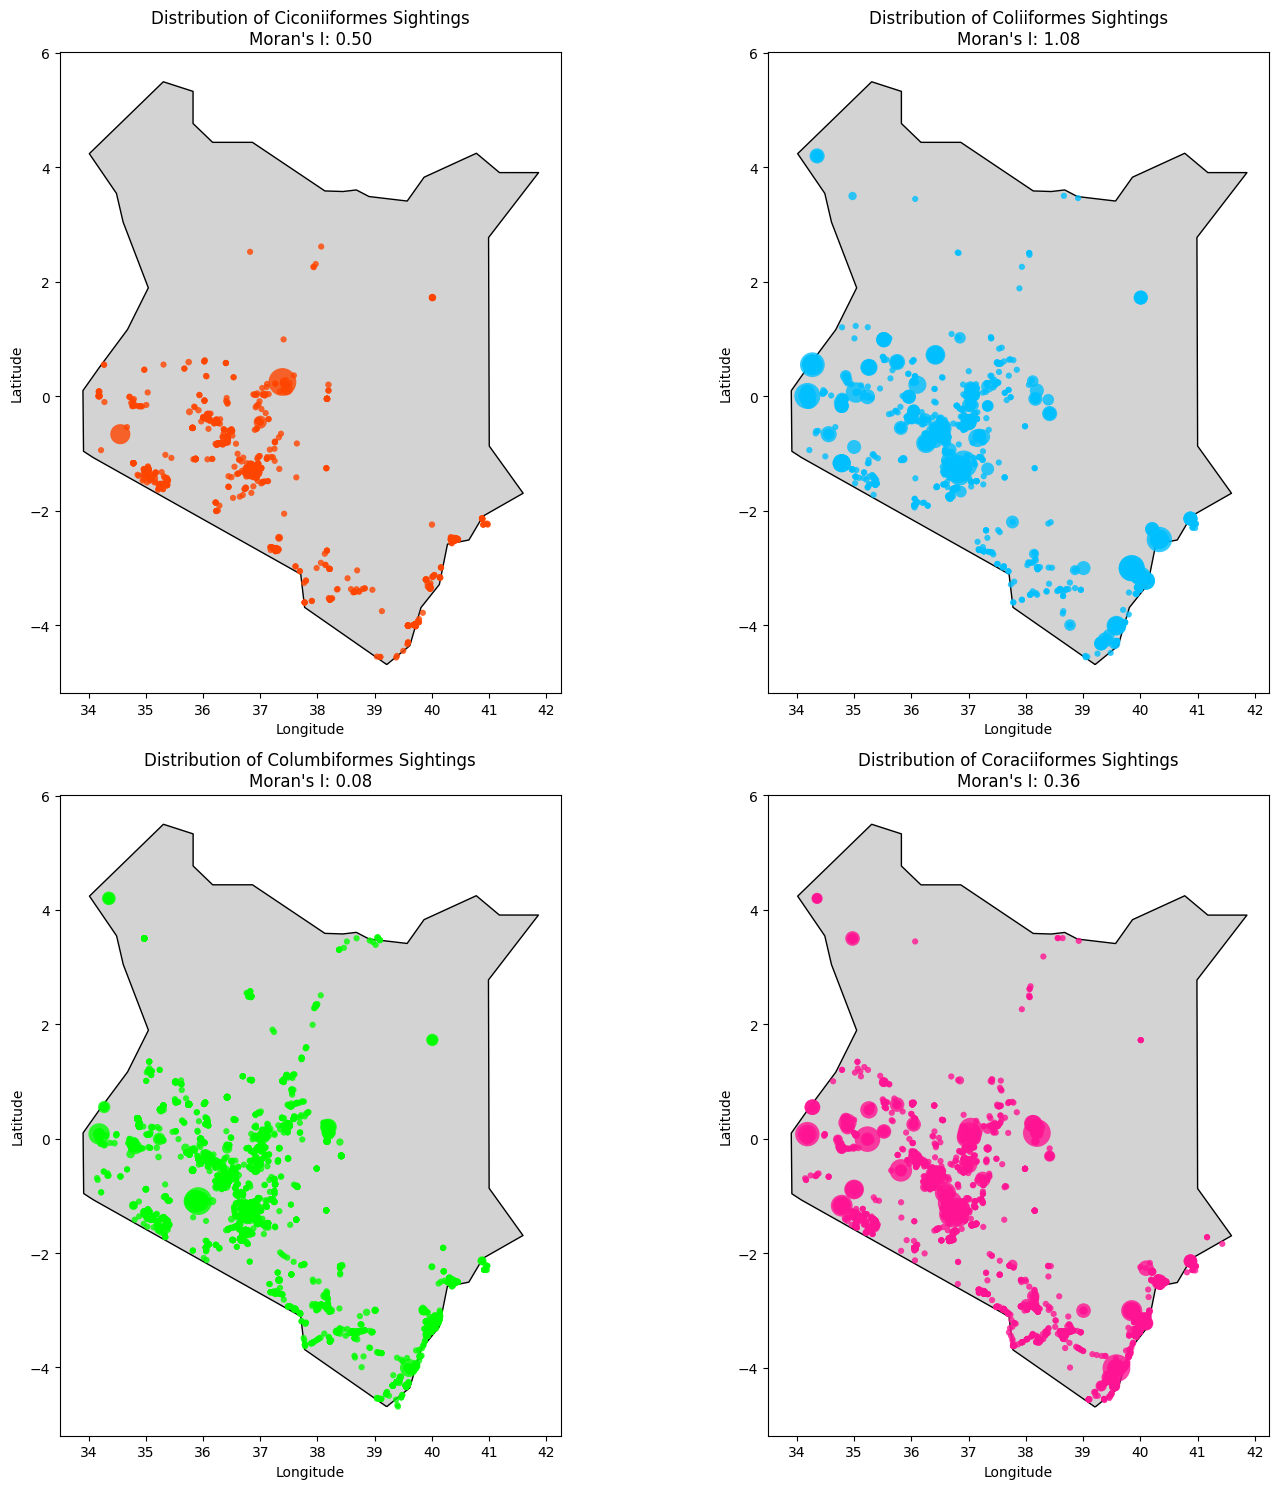

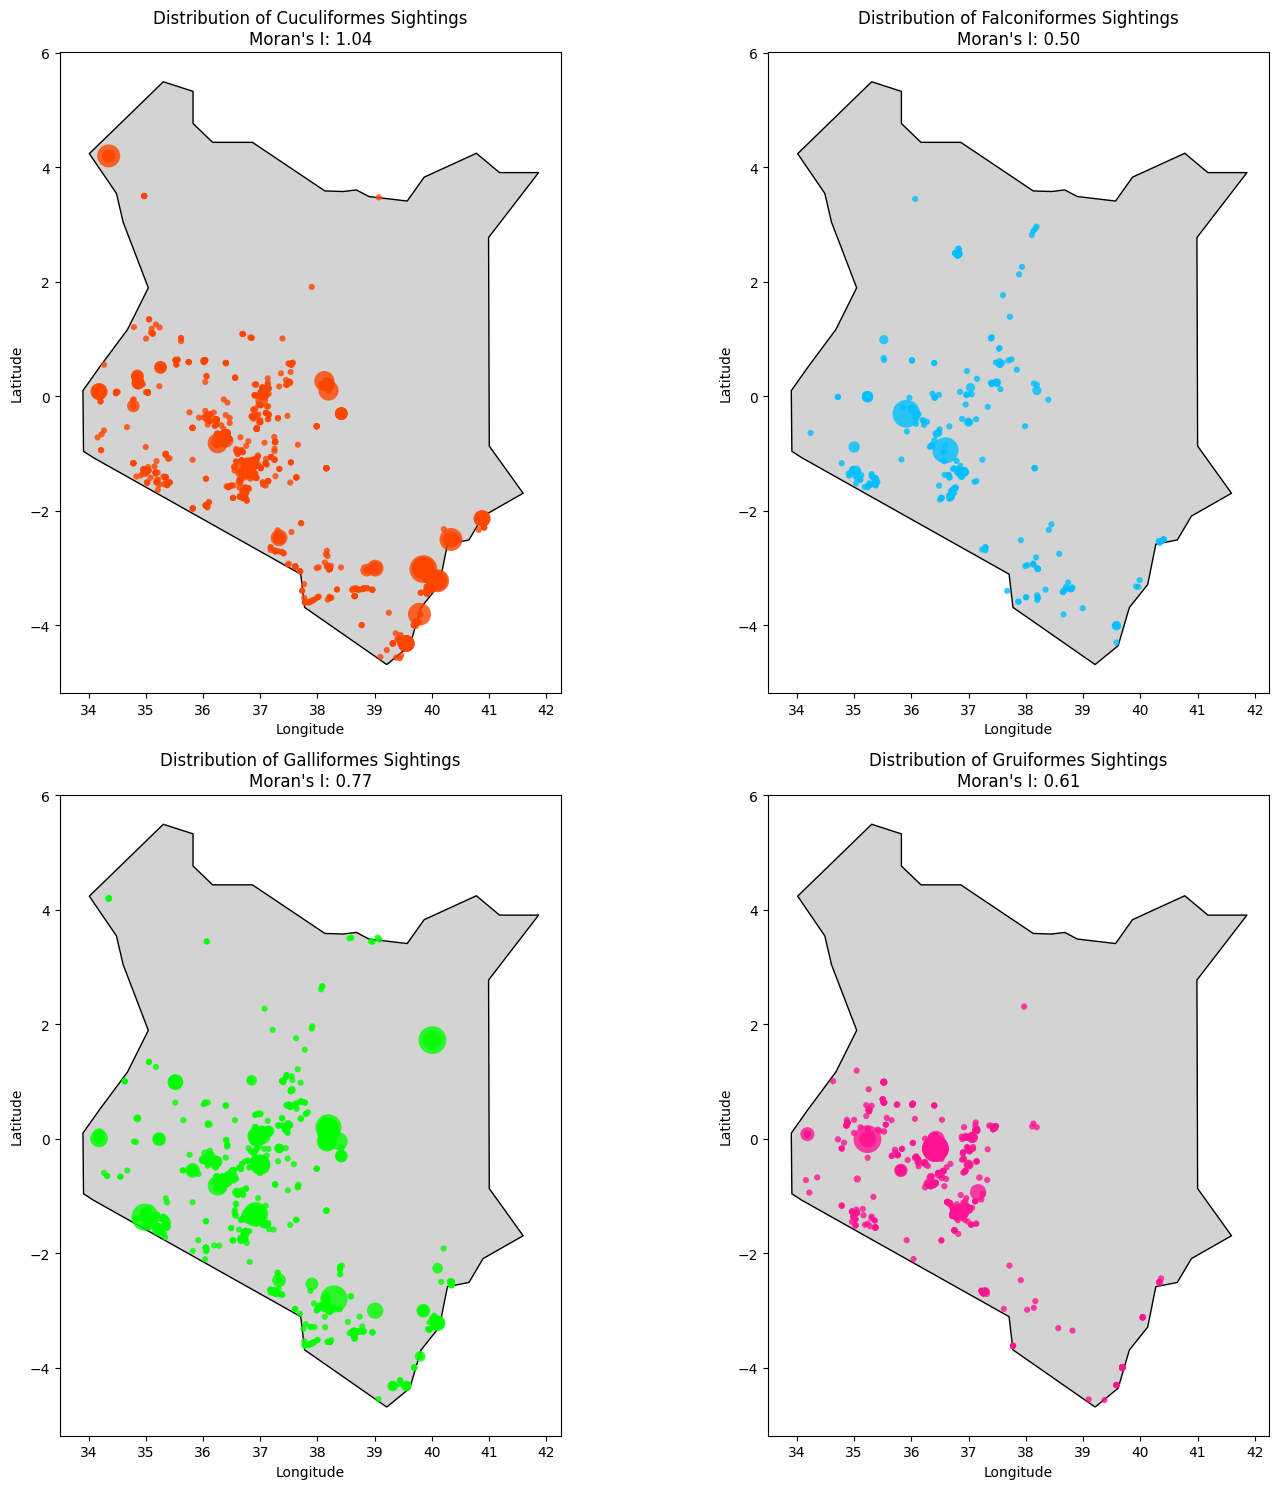

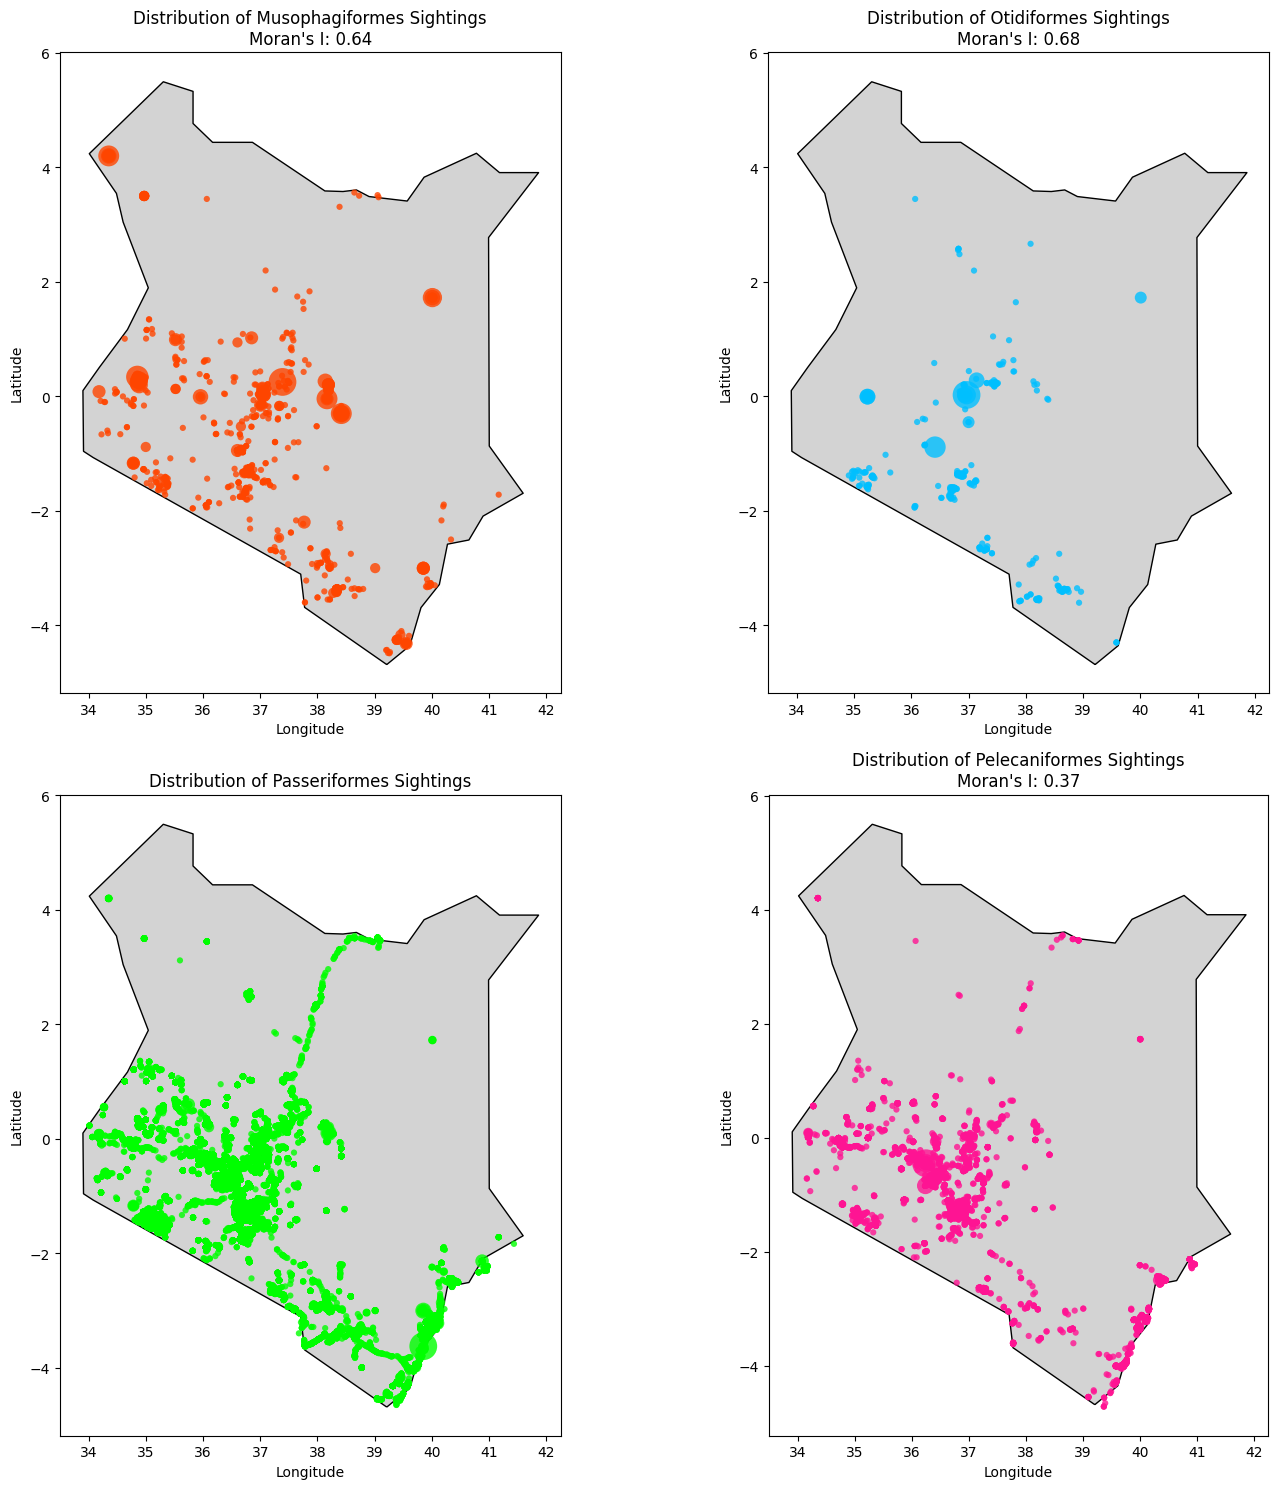

/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_5912/361685013.py:23: RuntimeWarning: invalid value encountered in scalar divide
  moran_i = (N / W) * (numerator / denominator)


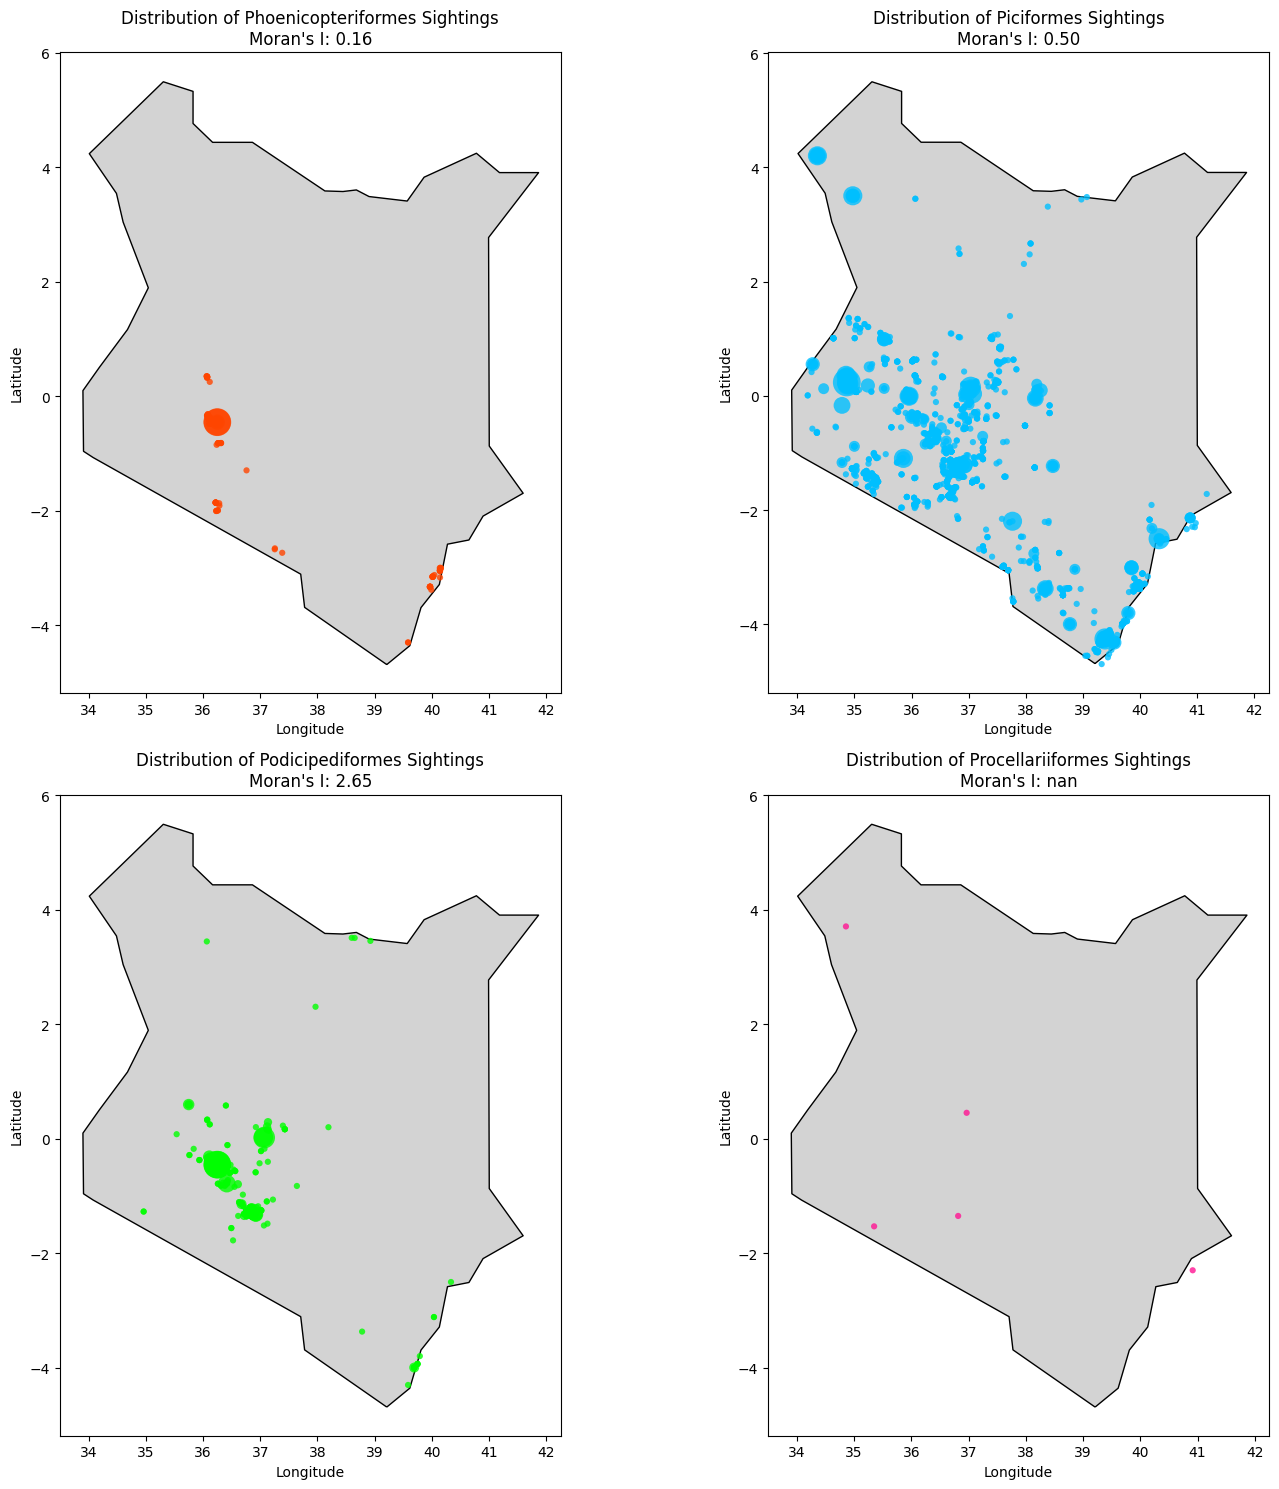

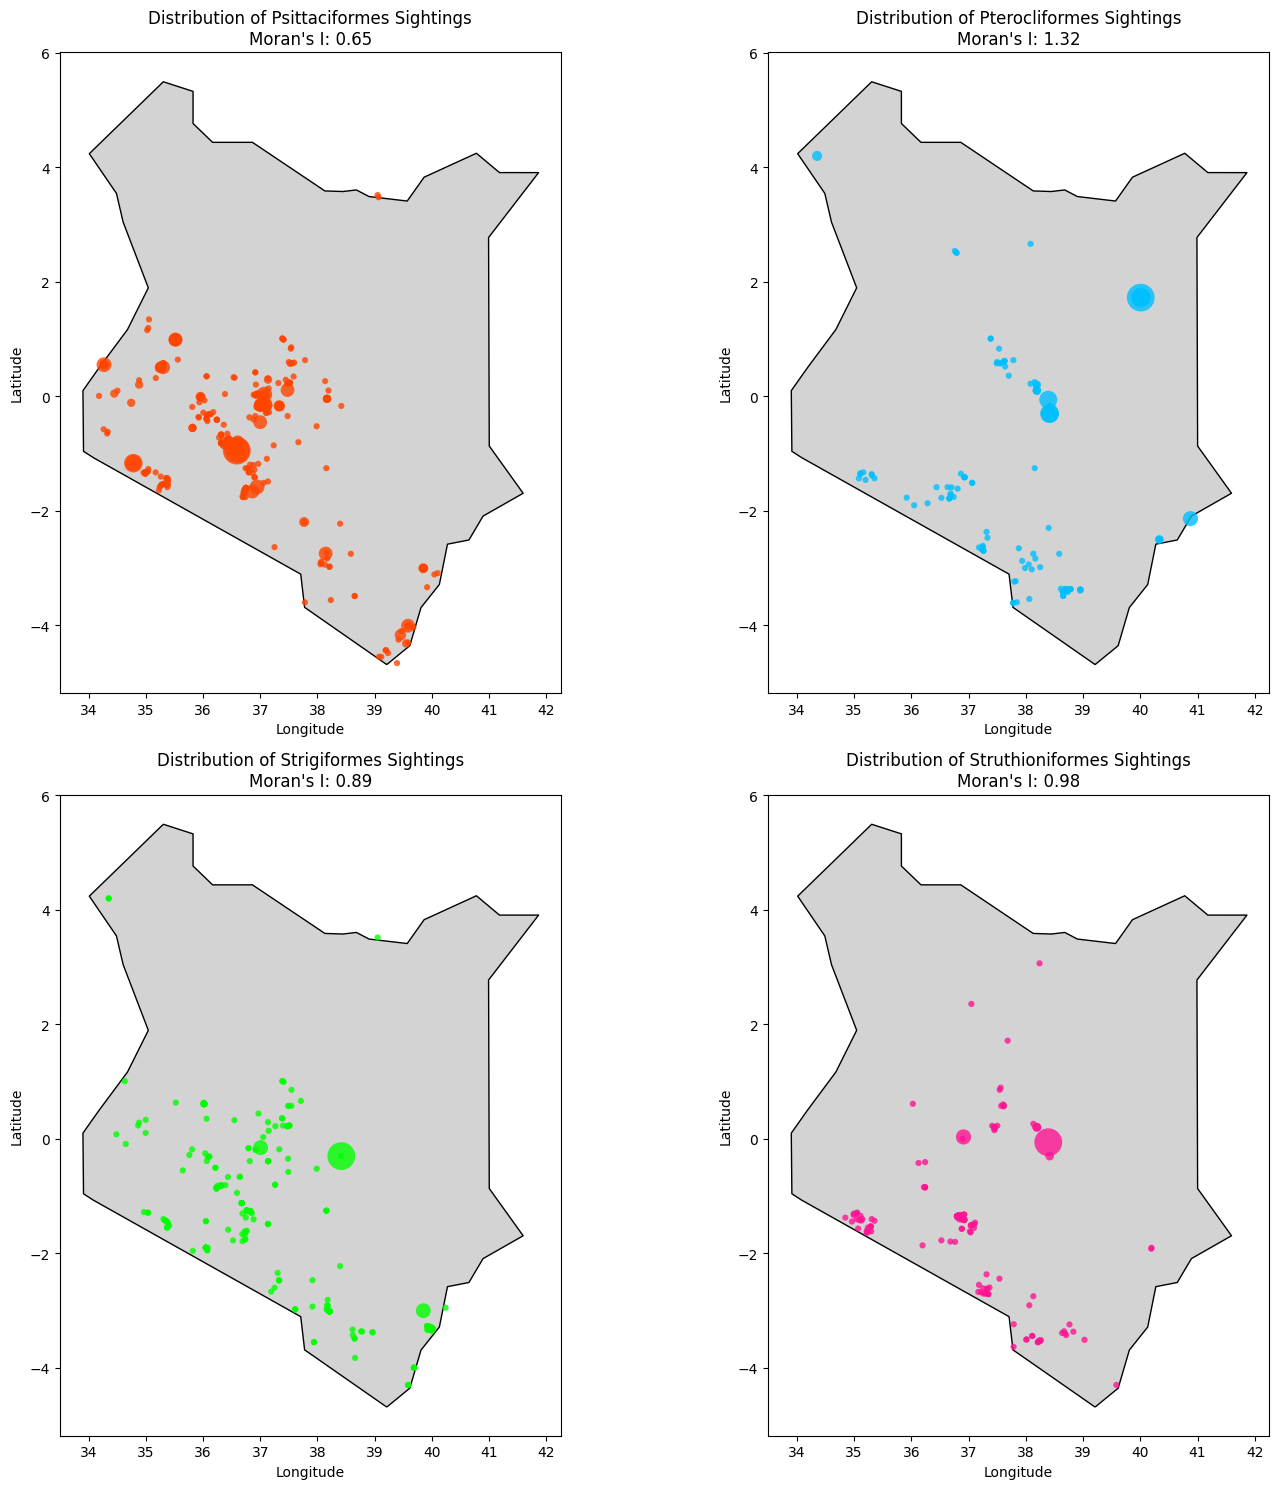

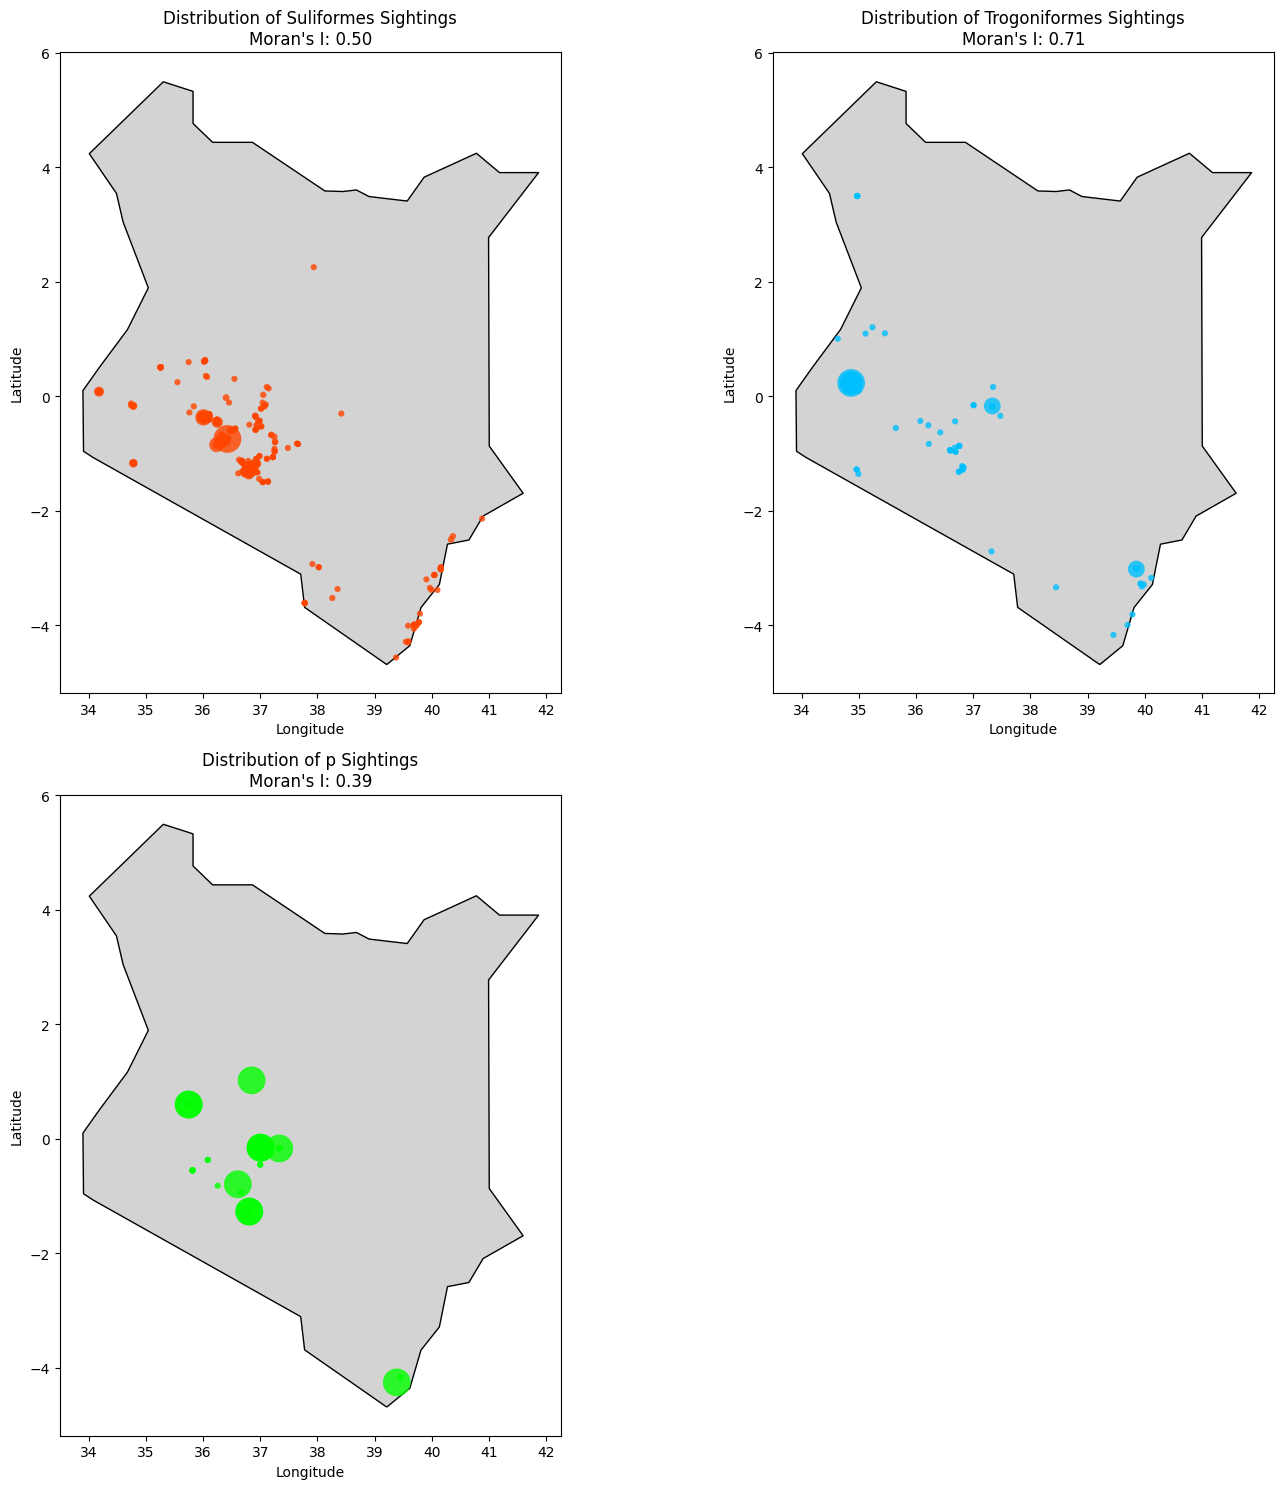

In [14]:
orders = sorted(q1_df['order'].unique().to_list())
current_orders = []
moran_values = []
morans = {}
for order in orders:
    current_orders.append(order)
    if order == "Passeriformes":
        moran_values.append(0)
    else:
        moran_values.append(moran(order=order))
    
    if len(current_orders) == 4:
        plot_kenya_order(current_orders, moran_values)
        current_orders = []
        moran_values = []

if current_orders:
    plot_kenya_order(current_orders, moran_values)


# QUESTION 2

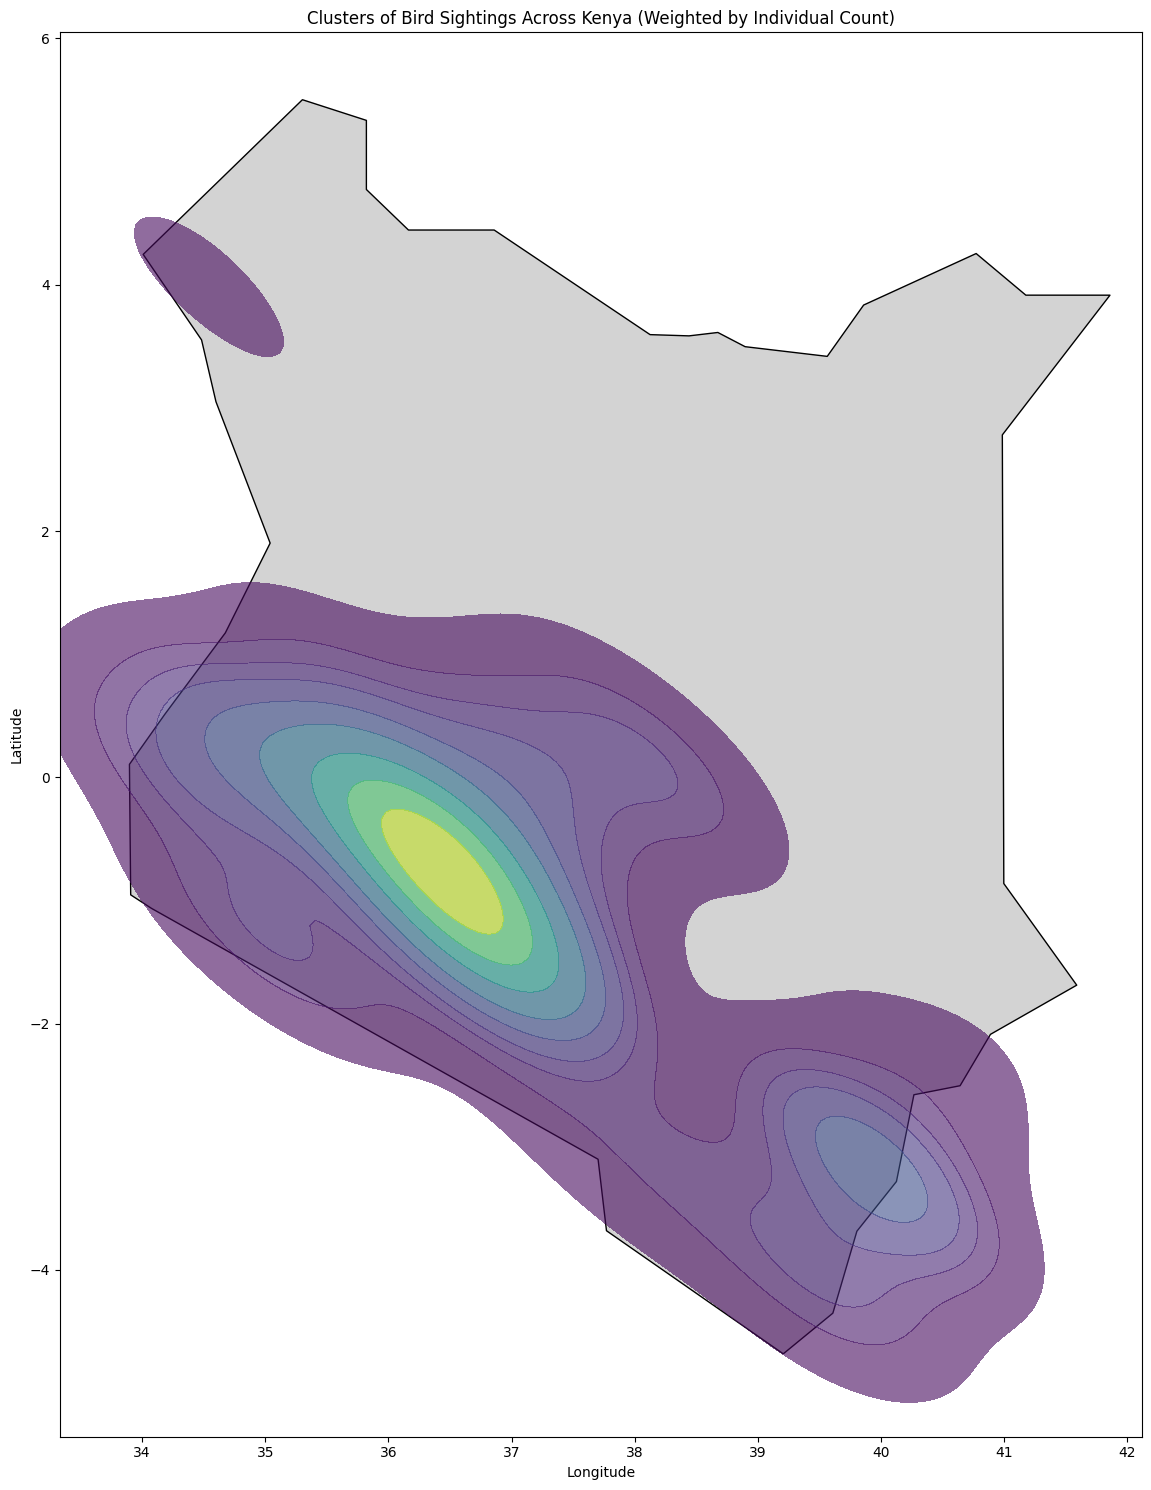

In [15]:
q2_df = df.select('decimalLatitude', 'decimalLongitude', 'individualCount')
# moran = moran(df=q2_df) -> problem

_, ax = plt.subplots(figsize=(15, 15))
kenya.plot(ax=ax, color='#D3D3D3', edgecolor='black')

sns.kdeplot(
    x=q2_df['decimalLongitude'], 
    y=q2_df['decimalLatitude'], 
    weights=q2_df['individualCount'],
    cmap="viridis", 
    fill=True, 
    alpha=0.6, 
    levels=10, 
    ax=ax
)


ax.set_title(f'Clusters of Bird Sightings Across Kenya (Weighted by Individual Count)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

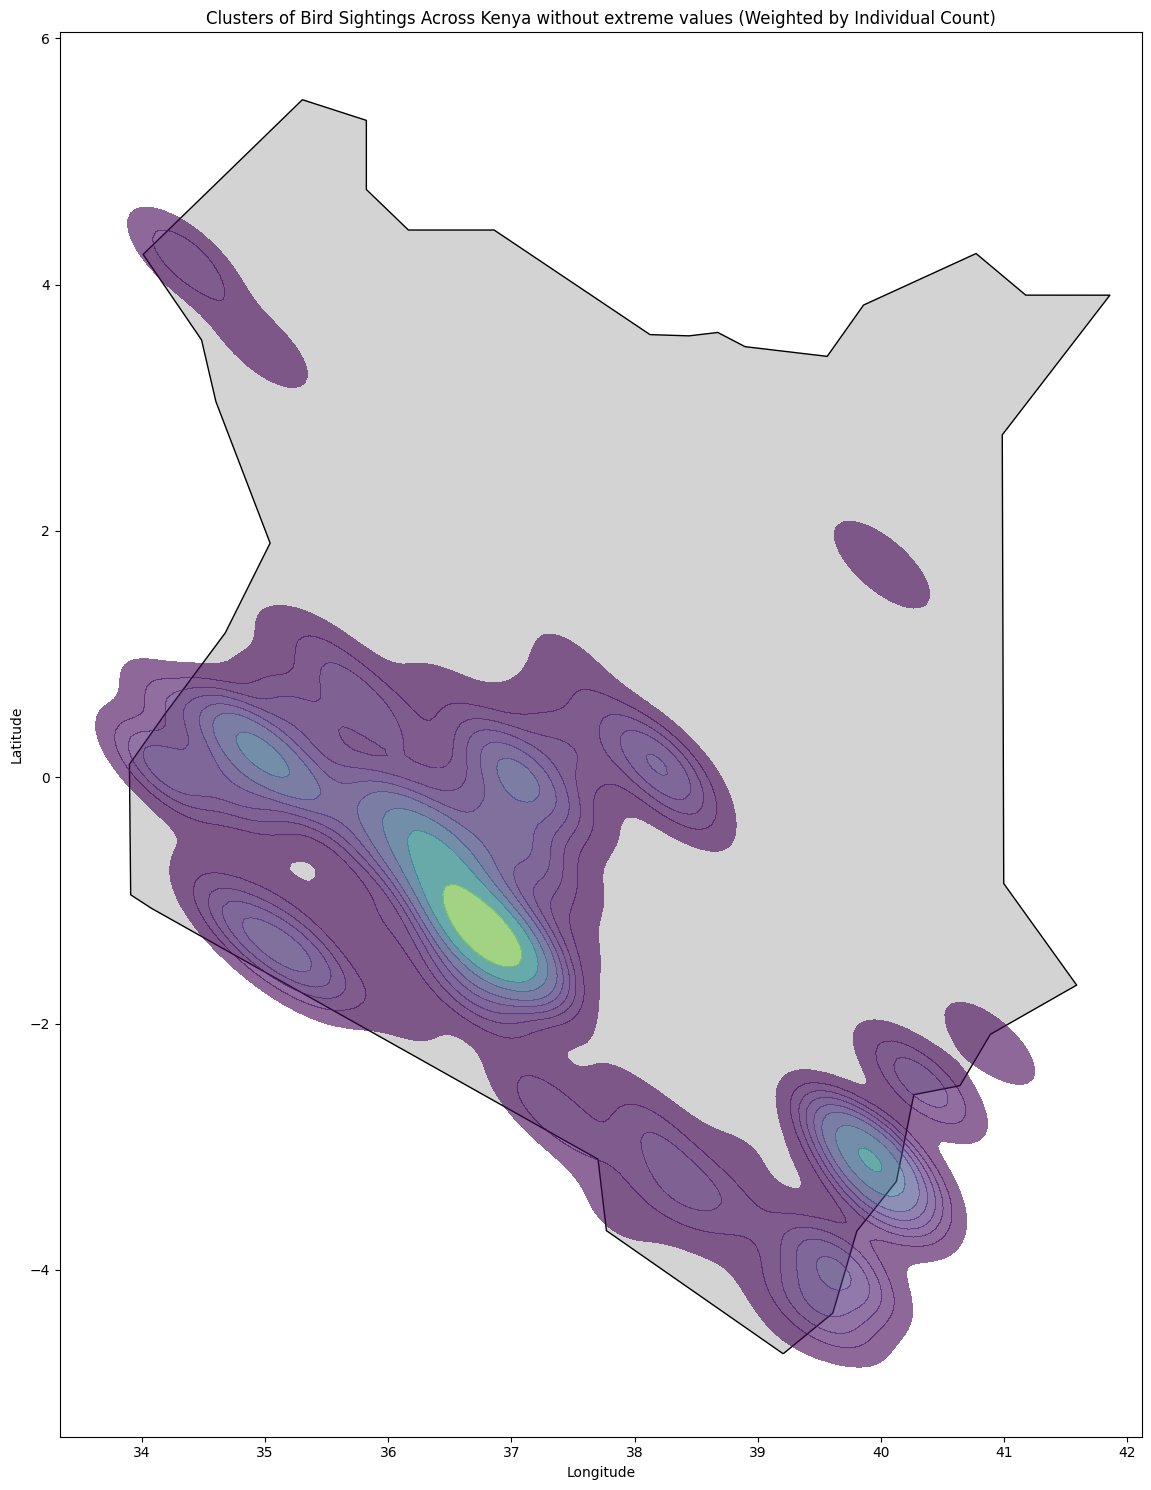

In [16]:
q2_df = df.select('decimalLatitude', 'decimalLongitude', 'individualCount').filter(pl.col('individualCount') <= 20)

_, ax = plt.subplots(figsize=(15, 15))
kenya.plot(ax=ax, color='#D3D3D3', edgecolor='black')

sns.kdeplot(
    x=q2_df['decimalLongitude'], 
    y=q2_df['decimalLatitude'], 
    weights=q2_df['individualCount'],
    cmap="viridis", 
    fill=True, 
    alpha=0.6, 
    levels=10, 
    ax=ax
)


ax.set_title(f'Clusters of Bird Sightings Across Kenya without extreme values (Weighted by Individual Count)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# QUESTION 4

In [17]:
county_dir = "kenya-counties-subcounties/geojson"
county_polygons = []

for filename in os.listdir(county_dir):
    if filename.endswith(".json"):
        county_name = filename.replace(".json", "")
        with open(os.path.join(county_dir, filename)) as f:
            data = json.load(f)
            for geometry in data['geometries']:
                coordinates = geometry['coordinates'][0][0]
                polygon = Polygon(coordinates)
                county_polygons.append({'county': county_name, 'geometry': polygon})

county_gdf = gpd.GeoDataFrame(county_polygons, crs="EPSG:4326")

gdf_observations = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['decimalLongitude'], df['decimalLatitude']),
    crs="EPSG:4326"
)

observations_with_county = gpd.sjoin(gdf_observations, county_gdf, how="left", predicate="within")
observations_with_county.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,geometry,index_right,county
0,579a9f82-3eab-45c2-875d-fcb634b84c9a,Least Concern (LC),1,2018-01-04,-2.223293,40.967442,Accipiter badius,Aves,Accipitriformes,Accipitridae,Accipiter,badius,Shikra,POINT (40.96744 -2.22329),28.0,lamu
1,190323ff-2e26-4964-961e-79ac0fe2a73e,Least Concern (LC),1,2018-01-11,0.632465,36.035565,Accipiter badius,Aves,Accipitriformes,Accipitridae,Accipiter,badius,Shikra,POINT (36.03556 0.63246),14.0,baringo
2,82c2acec-5ed5-4b92-be62-2b43522a6f46,Least Concern (LC),1,2018-01-12,1.010063,37.385208,Accipiter badius,Aves,Accipitriformes,Accipitridae,Accipiter,badius,Shikra,POINT (37.38521 1.01006),43.0,samburu
3,e49afe06-1ab4-410e-8971-186b5967b86b,Least Concern (LC),1,2018-01-13,1.114823,37.460524,Accipiter badius,Aves,Accipitriformes,Accipitridae,Accipiter,badius,Shikra,POINT (37.46052 1.11482),43.0,samburu
4,f34df1bf-97f4-47c8-baa8-58a2d40e3b52,Least Concern (LC),1,2018-01-30,1.014339,37.393476,Accipiter badius,Aves,Accipitriformes,Accipitridae,Accipiter,badius,Shikra,POINT (37.39348 1.01434),43.0,samburu


In [18]:
richness_per_county = observations_with_county.groupby('county')[6].nunique().reset_index()
richness_per_county.columns = ['county', 'order_richness']
county_richness_gdf = county_gdf.merge(richness_per_county, on='county', how='left').fillna(0)
county_richness_gdf.head()


,county,geometry,order_richness
0,busia,"POLYGON ((33.95197 -0.03283, 34.00794 -0.02864...",115.0
1,uasin-gishu,"POLYGON ((34.85349 0.54655, 34.86811 0.54629, ...",192.0
2,machakos,"POLYGON ((36.89069 -1.41375, 36.90949 -1.42286...",304.0
3,bomet,"POLYGON ((35.01399 -0.89025, 35.02332 -0.89277...",2.0
4,nairobi,"POLYGON ((36.66313 -1.30575, 36.65372 -1.31614...",552.0


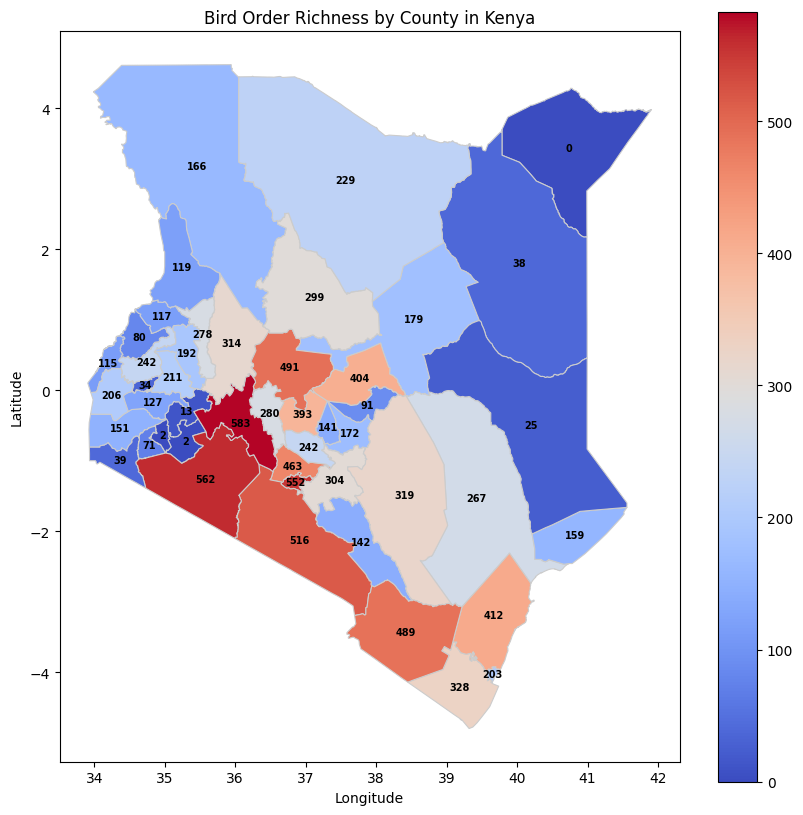

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
county_richness_gdf.plot(column='order_richness', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Bird Order Richness by County in Kenya')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for idx, row in county_richness_gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, int(row['order_richness']), 
            ha='center', va='center', fontsize=7, fontweight = 'bold', color='black')

plt.show()
